In [158]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree


In [140]:
# load data
train_data=pd.read_csv('./fraud dataset/fraudTrain.csv')
test_data=pd.read_csv('./fraud dataset/fraudTest.csv')

In [141]:
# explore data
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [142]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [143]:
train_data.shape

(1296675, 23)

In [144]:
train_data.isnull().sum()
test_data.isnull().sum()
#there is no null data in the train and test data

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [145]:
train_data.duplicated().sum()
#there is no duplicate in the training data
test_data.duplicated().sum()
#there is no duplicate in the test data

0

C:\Users\hamdi\AppData\Local\Temp\ipykernel_28316\203367844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Not Fraud', 'Fraud'], rotation=45)


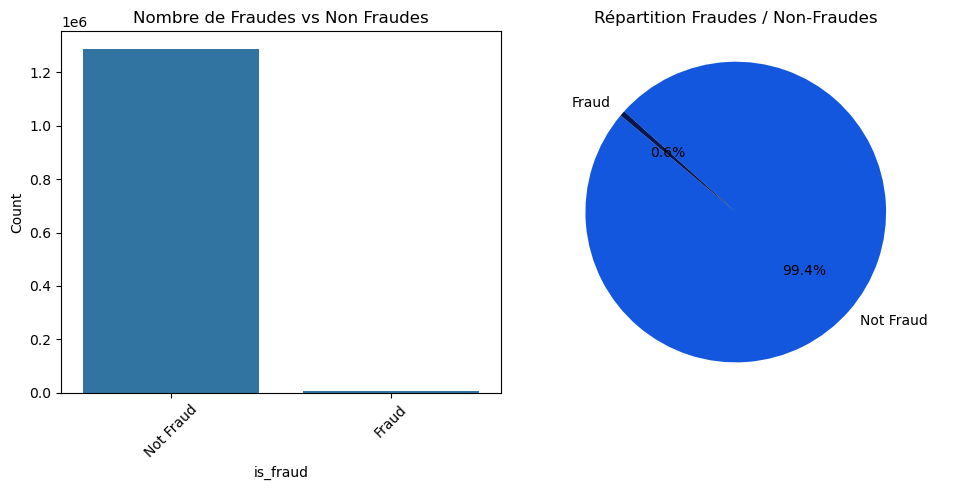

In [146]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  

sns.countplot(data=train_data, x='is_fraud', order=train_data['is_fraud'].value_counts().index, ax=ax[0])
ax[0].set_title("Nombre de Fraudes vs Non Fraudes")
ax[0].set_xlabel("is_fraud")
ax[0].set_ylabel("Count")
ax[0].set_xticklabels(['Not Fraud', 'Fraud'], rotation=45)



fraud_counts = train_data['is_fraud'].value_counts()
ax[1].pie(fraud_counts, labels=['Not Fraud', 'Fraud'],
          autopct='%1.1f%%', colors=["#1357DF", "#041752"], startangle=140)
ax[1].set_title("Répartition Fraudes / Non-Fraudes")
ax[1].axis('equal') 

plt.tight_layout()
plt.show()




In [147]:
# data preprocessing
train_data['trans_date_trans_time']=pd.to_datetime(train_data['trans_date_trans_time'],errors='coerce')
train_data['year'] =train_data['trans_date_trans_time'].dt.year
train_data['month'] = train_data['trans_date_trans_time'].dt.month
train_data['day'] =train_data['trans_date_trans_time'].dt.day





In [148]:
test_data['trans_date_trans_time']=pd.to_datetime(test_data['trans_date_trans_time'],errors='coerce')
test_data['year'] = test_data['trans_date_trans_time'].dt.year
test_data['month'] = test_data['trans_date_trans_time'].dt.month
test_data['day'] = test_data['trans_date_trans_time'].dt.day

In [149]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day'],
      dtype='object')

In [150]:
columns_to_drop=['Unnamed: 0', 'trans_num', 'first', 'last', 'street', 'city', 'zip', 'dob','trans_date_trans_time']
categorical_columns=['category', 'gender', 'state', 'job', 'merchant']
numerical_columns=['amt', 'lat', 'long', 'city_pop', 'unix_time', 'time_since_last_transaction', 'merch_lat', 'merch_long']

In [151]:
train_data=train_data.drop(columns=columns_to_drop)
test_data=test_data.drop(columns=columns_to_drop)

In [152]:
le =LabelEncoder()
for col in categorical_columns:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])



In [153]:
# data splitting
X_train=train_data.drop('is_fraud',axis=1)
Y_train=train_data['is_fraud']
X_test=test_data.drop('is_fraud',axis=1)
Y_test=test_data['is_fraud']



In [ ]:
# train the model
model= DecisionTreeClassifier(max_depth=4,random_state=0)
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
prediction.shape

(555719,)

In [ ]:
# evaluate the model
print("model accuracy",accuracy_score(Y_test,prediction))



model accuracy 0.996931902634245


In [160]:
print(confusion_matrix(Y_test,prediction))

[[553041    533]
 [  1172    973]]


In [161]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.65      0.45      0.53      2145

    accuracy                           1.00    555719
   macro avg       0.82      0.73      0.77    555719
weighted avg       1.00      1.00      1.00    555719



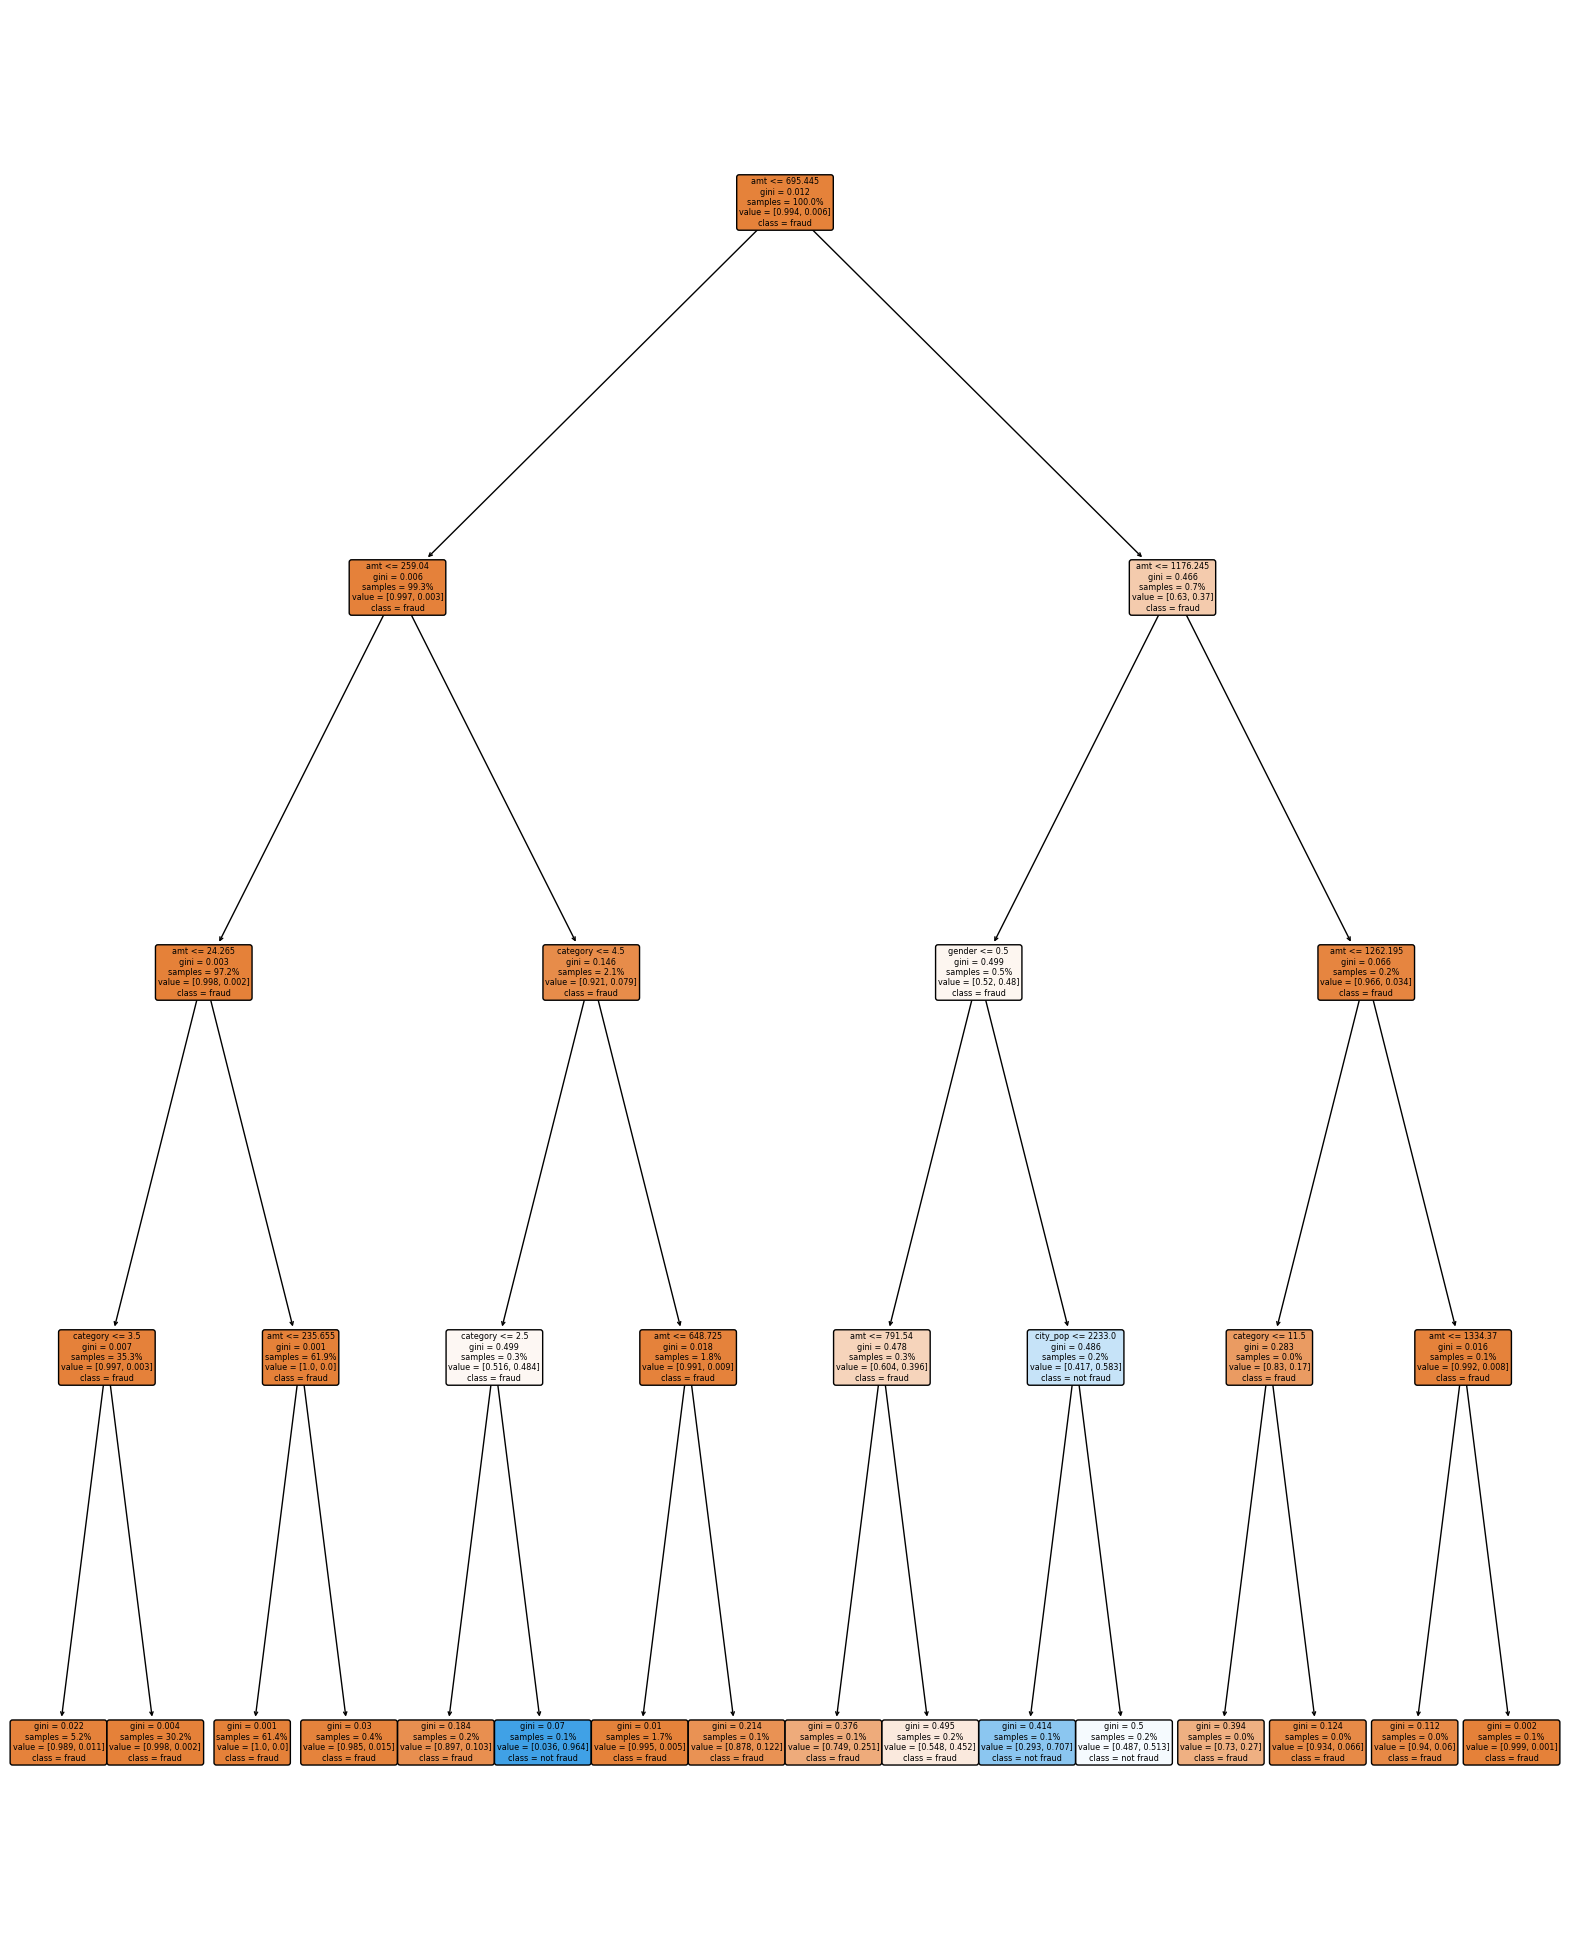

In [162]:
plt.figure(figsize=(20,25))
tree.plot_tree(model,feature_names=X_train.columns,class_names=['fraud', 'not fraud'],rounded=True, 
          filled=True, 
          proportion=True
        )
plt.show()